In [8]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import  matplotlib.pyplot as plt

In [130]:
def p_hit(T,sigma,K, mu):
    x = np.log(K)-mu*T
    sT = sigma*np.sqrt(T)
    return norm.cdf(x/sT)

def p_hit_before_time(T,sigma,K, mu):
    if K>0.9999:
        return 1.0
        
    lnK = np.log(K)
    s2 = sigma**2
    sqrtT = np.sqrt(T)
    sigma05T = sigma*sqrtT
    num = np.exp(2*mu*lnK/s2)*norm.cdf((lnK+mu*T)/sigma05T)
    den = norm.cdf((lnK-mu*T)/sigma05T)
    return (1+num/(den+1e-9))*p_hit(T,sigma,K,mu)

def p_hit_in_t(T,sigma,S,K, mu):
    BL = K/S
    dt = 1/260.0
    a = p_hit_before_time(T+dt,sigma,BL, mu)
    b = p_hit_before_time(T,sigma,BL, mu)
    return (a-b)/dt




INTEGRAL
0.3272916752120168


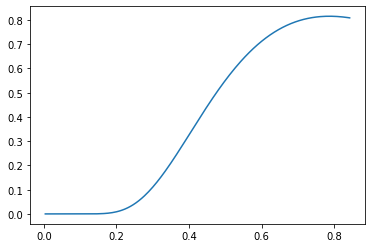

INTEGRAL
0.002903966714100094


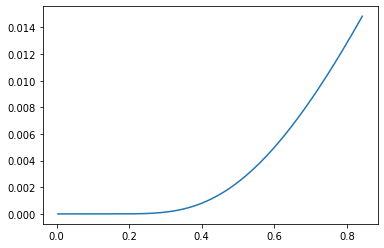

In [138]:
sigma = 0.5/np.sqrt(260.0)
t = np.array(range(1,220))/260.0
dt = t[1]-t[0]
S=100.0
K=94.0
p = []

for i in t:
    prob = p_hit_in_t(i,sigma,S,K,-0.05)
    p.append(prob)
print("INTEGRAL")
print(np.sum(np.array(p))*dt)
plt.plot(t,p)
plt.show()
p=[]
for i in t:
    prob = p_hit(i,sigma,K/S,0.0)
    p.append(prob)
print("INTEGRAL")
print(np.sum(np.array(p))*dt)
plt.plot(t,p)
plt.show()

[254.11842809098815, 232.8343515344763, 161.07511240385375, 53.54891695990846, 13.169303222341053, 2.4686670964591073, 0.34928817187206074, 0.037208996593533564, 0.0029925249333278355, 0.00018282629801300541]


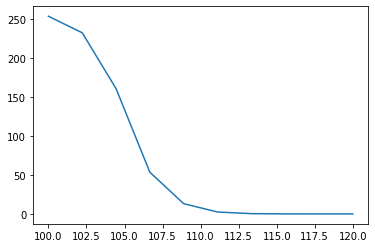

In [140]:
def accumulatorpayoff(S,days_to_maturity,gearing, BL, shares_per_day,sigma,mu):
    tv = np.array(range(1,days_to_maturity))/260.0
    acc_shares = 0.0
    for t in tv:
        acc_shares += shares_per_day*(gearing * p_hit(t,sigma,BL/S,mu))
    return acc_shares

S= 110
mu=0.0
BL = 105
sigma = 0.5/np.sqrt(260)
shares_per_day=1
gearing = 1.0
days_to_maturity = 260
svec = np.linspace(100,120,10)
shares_acc = []
for s in svec:
    aux = accumulatorpayoff(s,days_to_maturity,gearing,BL,shares_per_day,sigma,mu)
    shares_acc.append(aux)
plt.plot(svec,shares_acc)
print(shares_acc)